<a href="https://colab.research.google.com/github/niteshavagabond/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction_Nitesh_Verma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yes Bank Stock Closing Price Prediction


## Problem Statement

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the
news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting
to see how that impacted the stock prices of the company and whether Time series models
or any other predictive models can do justice to such situations. This dataset has monthly
stock prices of the bank since its inception and includes closing, starting, highest, and lowest
stock prices of every month. The main objective is to predict the stock’s closing price of the
month.

In [1324]:
# importing libraries
import pandas as pd
import numpy as np
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
# plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = (10,6)
import math
from sklearn import neighbors

from sklearn import model_selection
from sklearn.model_selection import KFold

from xgboost import XGBRegressor                       # xgboost model
from sklearn.ensemble import RandomForestRegressor     # random forest model
from sklearn.svm import SVR                            # support vector regressor
from sklearn.linear_model import (Lasso, Ridge,        # regularization
ElasticNet, LassoCV, RidgeCV, ElasticNetCV)
from sklearn.model_selection import GridSearchCV       # grid search to optimize parameters


In [1325]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1326]:
# loading Dataset
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Yes Bank Stock Closing Price Prediction - Nitesh Verma/data_YesBank_StockPrices.csv') 

In [1327]:
# looking at first 5 rows
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [1328]:
# looking at last 5 rows
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [1329]:
df.shape

(185, 5)

In [1330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [1331]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [1332]:
# looking column names, datatype of features, null values, unique values and their number of unique values
df_columns_table=[[name,df[name].dtypes,df[name].isnull().sum(),round(df[name].isnull().sum()/len(df)*100, 2),
                   df[name].nunique(),df[name].unique()] for name in df.columns]
df_columns = pd.DataFrame(df_columns_table, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique'])
df_columns

,Column,Dtype,Null,Null (%),nUnique,Unique
0,Date,object,0,0.0,185,"[Jul-05, Aug-05, Sep-05, Oct-05, Nov-05, Dec-0..."
1,Open,float64,0,0.0,183,"[13.0, 12.58, 13.48, 13.2, 13.35, 13.49, 13.68..."
2,High,float64,0,0.0,184,"[14.0, 14.88, 14.87, 14.47, 13.88, 14.44, 17.1..."
3,Low,float64,0,0.0,183,"[11.25, 12.55, 12.27, 12.4, 12.88, 13.0, 13.58..."
4,Close,float64,0,0.0,185,"[12.46, 13.42, 13.3, 12.99, 13.41, 13.71, 15.3..."


In [1333]:
df['Date'] =df['Date'].apply(lambda x : datetime.strptime(x,'%b-%y'))

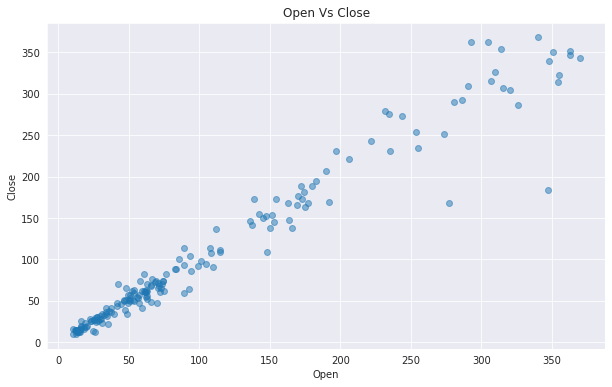

In [1334]:
plt.scatter(df['Open'], df['Close'], alpha=0.5)
plt.title('Open Vs Close')
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()

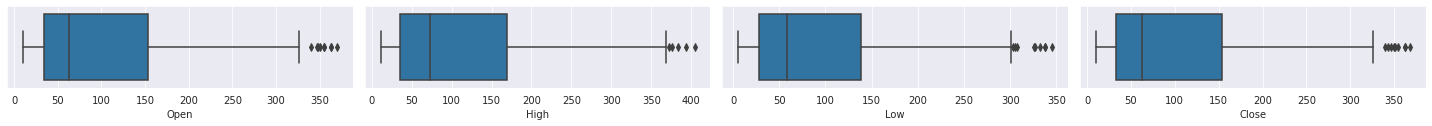

In [1335]:
# looking for outliers of every fearture of dataset with the help of boxplot
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize = (20, 10))
num_it = 1 

for col in df.describe().columns:
    plt.subplot(6,4,num_it)
    sns.boxplot(df[col])
    num_it+=1
    
plt.tight_layout()

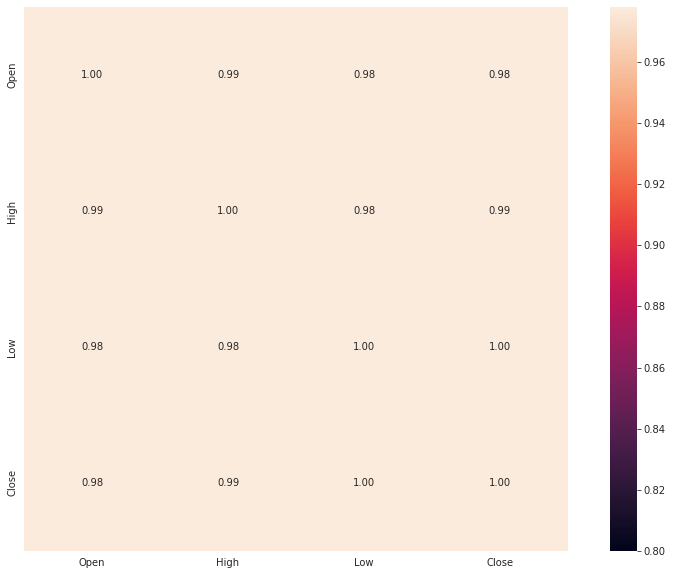

In [1336]:
# ploting heat map finding correlation between columns
hdf = df.corr()

plt.subplots(figsize=(15, 10))
sns.heatmap(hdf,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

In [1337]:
df.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

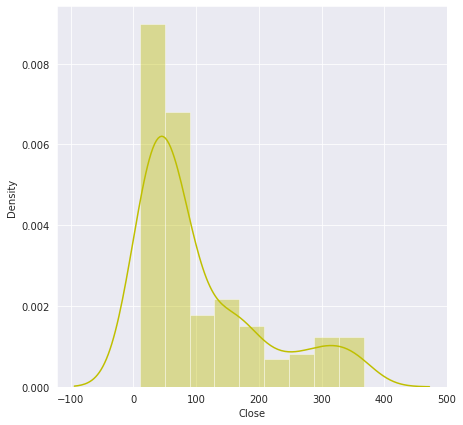

In [1338]:
# Dependent variable 'Close'
plt.figure(figsize=(7,7))
sns.distplot(df['Close'],color="y")

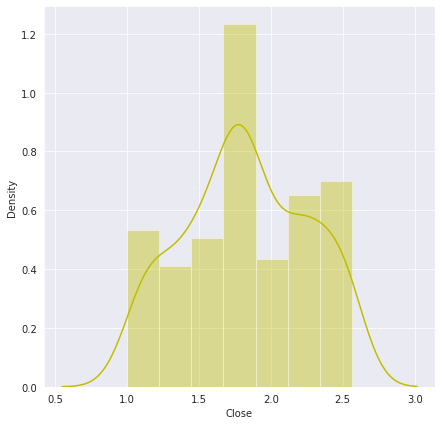

In [1339]:
# Dependent variable 'Close'
plt.figure(figsize=(7,7))
sns.distplot(np.log10(df['Close']),color="y")

In [1340]:
numeric_features = df.describe().columns
numeric_features

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

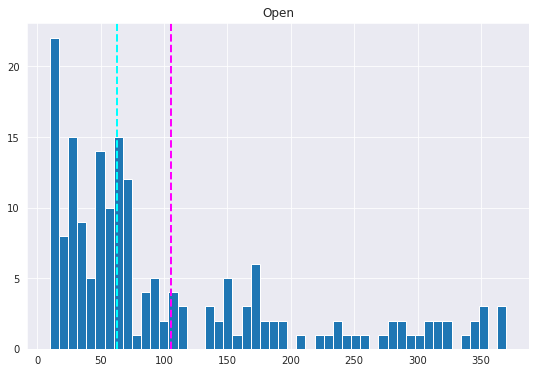

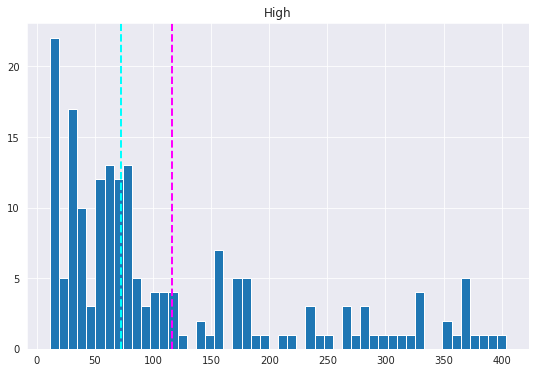

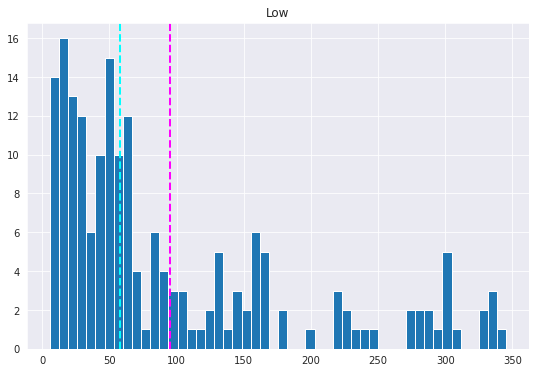

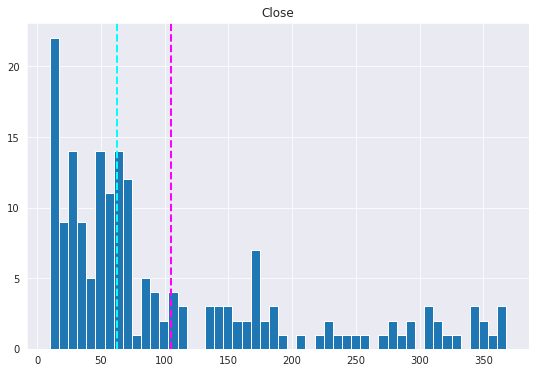

In [1341]:
#@title Default title text
# plot a bar plot for each numerical feature count

for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

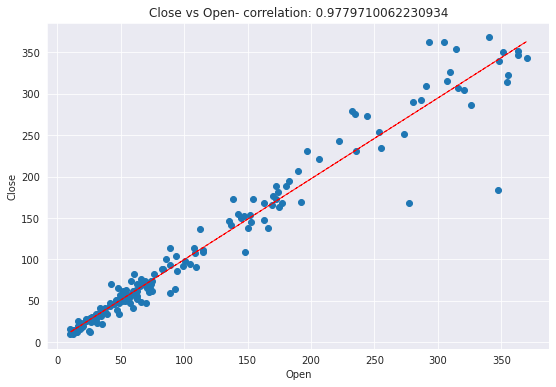

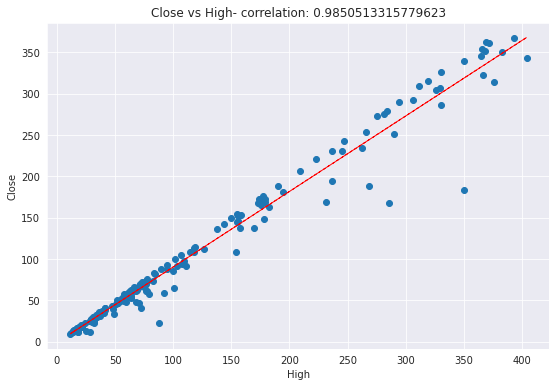

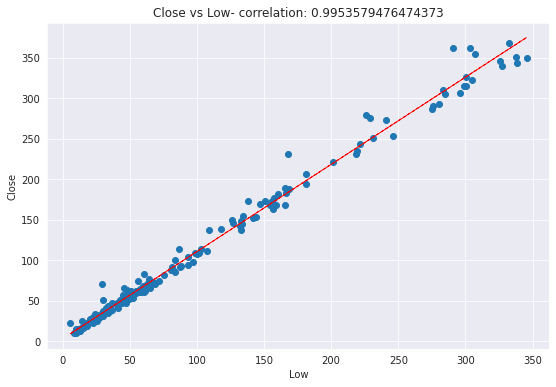

In [1342]:
for col in numeric_features[:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Close']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Close')
    ax.set_title('Close vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Close'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

In [1343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


In [1344]:
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [1345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


In [1346]:
df.set_index('Date', inplace= True)

In [1347]:
df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


# Functions

In [1348]:
#creating list of matrix to store the evaluation matrix of all model
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]

In [1349]:
# making a function to train and evaluate linear model
def train_linear_model (model,X_train,y_train,X_test,y_test):

#training the model
  model.fit(X_train,y_train)

  #predicting the values
  y_pred = model.predict(X_test)
  import math
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

  print('\n================Evaluation Matrix=========================\n')

  #finding mean_squared_error
  MSE  = mean_squared_error(10**(y_test),10**(y_pred))
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2 = r2_score(10**(y_test),10**(y_pred))
  print("R2 :" ,r2)
  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(10**(y_test),10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)
  
  print('\n================Evaluation Matrix=========================\n')
  

#appending metrice to list
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)
    
  # ploting the line graph of actual and predicted values
  print('\
  =========================================================\
  Evaluation Graph\
  ===================================================\n')  
  plt.figure(figsize=(20,10))
  plt.plot((y_pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

In [1350]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    y_preds = model.predict(X_test)
    
    import math
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    print('\n================Evaluation Matrix=========================\n')
    MSE  = mean_squared_error(10**(y_test),10**(y_preds))
    print("MSE :" , MSE)

    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    MAE_test = mean_absolute_error(10**(y_test), 10**(y_preds))
    print("MAE for test dataset:",MAE_test)
    
    MAPE_train = mean_absolute_percentage_error(10**(y_test), 10**(y_preds))
    print("MAPE for train dataset:",MAPE_train)
    
    r2 = r2_score(y_test,y_preds)
    print("R2 :" ,r2)
    adj_r2=1-(1-r2_score(10**(y_test),10**(y_preds)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2)

    train_class_preds = linear_model.predict(X_train)

    print('\n================Evaluation Matrix=========================\n')

    mean_sq_error.append(MSE)
    root_mean_sq_error.append(RMSE)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)

    #ploting 
    print('\
    =========================================================\
    Evaluation Graph\
    ===================================================\n') 
    plt.figure(figsize=(20,10))
    plt.plot(np.array(y_test[:100]))
    plt.plot(y_preds[:100])    
    plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
    plt.show()

In [1351]:
def get_features_importance (optimal_model,X):
  '''
  shows the graph of feature importance
  '''
  features = X.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

# Lime

In [1352]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1353]:
# LIME SECTION

import lime
import lime.lime_tabular
def LimeTabularExplainer_table(model,instance,num_features,dependent_var):
  
  # vaariable to store feature names
  # X=df.drop(dependent_var,axis=1)
  # feature_names =list(X.columns)
  X=X_test
  feature_names =list(X_test.columns)

  explainer = lime.lime_tabular.LimeTabularExplainer(X.values,feature_names=feature_names,mode='regression')

  # selecting the instace to explain
  choosen_instance = X.reset_index(drop=True).loc[[instance]].values[0]
  exp = explainer.explain_instance(choosen_instance, model.predict, num_features=num_features)
  exp.show_in_notebook(show_table=True)

# Implementing Linear Regression

In [1354]:
dependent_variable = 'Close'

In [1355]:
# Create a list of independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})

In [1356]:
X =df[independent_variables]

In [1357]:
X

,Open,High,Low
Date,,,
2005-07-01,13.00,14.00,11.25
2005-08-01,12.58,14.88,12.55
2005-09-01,13.48,14.87,12.27
2005-10-01,13.20,14.47,12.40
2005-11-01,13.35,13.88,12.88
...,...,...,...
2020-07-01,25.60,28.30,11.10
2020-08-01,12.00,17.16,11.85
2020-09-01,14.30,15.34,12.75


In [1358]:
# # Create the data of independent variables
# X = X_column.values

# # Create the dependent variable data
y = df[dependent_variable]
y = np.log10(y)

In [1359]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [1360]:
X_test

,Open,High,Low
Date,,,
2006-11-01,22.80,28.47,21.40
2020-06-01,27.75,31.95,25.55
2011-01-01,62.98,63.54,49.39
2008-11-01,14.79,17.80,11.25
2019-05-01,163.30,178.05,133.05
2018-06-01,348.00,350.10,327.35
2013-08-01,66.00,67.81,43.22
2020-04-01,22.30,30.45,20.30
2008-06-01,31.22,32.22,22.62


In [1361]:
# Transforming data (scaling of data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [1362]:
X_train[0:10]

array([[-0.50909647, -0.54503416, -0.4776513 ],
       [-0.44661995, -0.50728812, -0.50057343],
       [ 0.62253465,  0.53044909,  0.66132623],
       [ 2.57744503,  2.32422275,  2.64557097],
       [ 0.63261151,  0.54327902,  0.67613239],
       [-0.82450211, -0.82617708, -0.78693552],
       [-0.94451748, -0.96767825, -0.91196532],
       [ 0.83213329,  0.84115664,  0.93364989],
       [ 0.28606837,  0.34376424,  0.3383326 ],
       [-0.02832959, -0.09970525, -0.03017626]])

In [1363]:
y_train

Date
2010-06-01    1.731024
2011-08-01    1.745153
2015-07-01    2.219427
2017-08-01    2.545493
2015-05-01    2.246794
                ...   
2016-08-01    2.435462
2016-12-01    2.364101
2011-07-01    1.793301
2017-03-01    2.491109
2008-08-01    1.428621
Name: Close, Length: 148, dtype: float64

In [1364]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [1365]:
# intercept
regressor.intercept_

1.8360692211929706

In [1366]:
# coefficent values
regressor.coef_

array([-0.04683598,  0.20078783,  0.23226311])

In [1367]:
# Predicting train dataset
y_pred_train = regressor.predict(X_train)

In [1368]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [1369]:
#Predicted profit on the test data
y_pred

array([1.51738682, 1.53211837, 1.63519027, 1.47539354, 2.01471458,
       2.74366588, 1.62601875, 1.51851685, 1.52352095, 1.62092587,
       2.07716025, 1.61560053, 1.47290774, 2.63685207, 1.70384859,
       1.61032504, 1.52501328, 1.95399032, 1.81967493, 1.76423173,
       1.53162271, 1.480381  , 1.83883617, 1.6394682 , 2.05986731,
       1.49003242, 1.4767562 , 1.61402383, 1.53535964, 1.66894676,
       2.4177132 , 2.75914846, 1.68261819, 2.34869197, 1.78260049,
       1.62415017, 2.34100799])

In [1370]:
# Actual profits on test data
((y_test))

Date
2006-11-01    1.403464
2020-06-01    1.408240
2011-01-01    1.720903
2008-11-01    1.088490
2019-05-01    2.170115
2018-06-01    2.530968
2013-08-01    1.687083
2020-04-01    1.446382
2008-06-01    1.358886
2010-01-01    1.697578
2015-03-01    2.213013
2010-03-01    1.707315
2005-11-01    1.127429
2017-12-01    2.498379
2012-04-01    1.845532
2008-02-01    1.693903
2009-06-01    1.472464
2016-01-01    2.174292
2014-05-01    2.056486
2014-04-01    1.945173
2009-07-01    1.504199
2006-06-01    1.193681
2014-07-01    2.034267
2012-01-01    1.819478
2015-04-01    2.225206
2006-09-01    1.266232
2009-01-01    1.087781
2007-12-01    1.697317
2007-02-01    1.456821
2012-05-01    1.819676
2019-03-01    2.439412
2018-05-01    2.539327
2014-01-01    1.789510
2016-11-01    2.369735
2013-04-01    2.001214
2009-12-01    1.727623
2016-07-01    2.386392
Name: Close, dtype: float64

In [1371]:
# Evaluation metrics for train data

MSE_train  = mean_squared_error(10**(y_train), 10**(y_pred_train))
print("MSE for train dataset:" , MSE_train)

RMSE_train = np.sqrt(MSE_train)
print("RMSE for train dataset:" ,RMSE_train)

MAE_train = mean_absolute_error(10**(y_train), 10**(y_pred_train))
print("MAE for train dataset:",MAE_train)

MAPE_train = mean_absolute_percentage_error(10**(y_train), 10**(y_pred_train))
print("MAPE for train dataset:",MAPE_train)

r2_train = r2_score(10**(y_train), 10**(y_pred_train))
print("R-SQUARE for train dataset:",r2_train)

adjusted_r2_train = 1-((1-r2_train)*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print("Adjusted R2 for train dataset: ",adjusted_r2_train)

MSE for train dataset: 5384.180130659762
RMSE for train dataset: 73.3769727548075
MAE for train dataset: 38.79224322779227
MAPE for train dataset: 0.404887799791305
R-SQUARE for train dataset: 0.44817219416623444
Adjusted R2 for train dataset:  0.43667578154469766


In [1372]:
# Evaluation metrics for test data

MSE_test  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE for test dataset:" , MSE_test)

RMSE_test = np.sqrt(MSE_test)
print("RMSE for test dataset:" ,RMSE_test)

MAE_test = mean_absolute_error(10**(y_test), 10**(y_pred))
print("MAE for test dataset:",MAE_test)

MAPE_test = mean_absolute_percentage_error(10**(y_test), 10**(y_pred))
print("MAPE for test dataset:",MAPE_test)

r2_test = r2_score(10**(y_test), 10**(y_pred))
print("R-SQUARE for test dataset:",r2_test)

adjusted_r2_test = 1-((1-r2_test)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 for test dataset: ",adjusted_r2_test)


MSE for test dataset: 3597.8813540947276
RMSE for test dataset: 59.98234201908698
MAE for test dataset: 33.14227103290168
MAPE for test dataset: 0.3889798784005788
R-SQUARE for test dataset: 0.6114325236201973
Adjusted R2 for test dataset:  0.5761082075856698


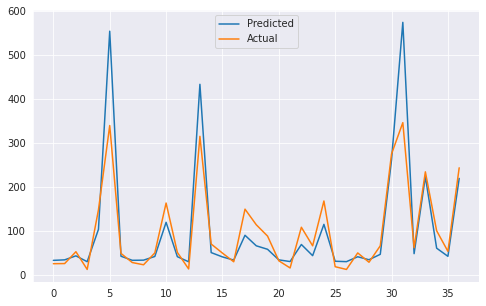

In [1373]:
plt.figure(figsize=(8,5))
plt.plot(np.array(10**(y_pred)))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# Implementing Ridge (L2) regression

In [1374]:
#Implementing ridge regression model
ridge= Ridge()

#Fitting the model
ridge.fit(X_train,y_train)

Ridge()

In [1375]:
#Score 
ridge.score(X_train, y_train)

0.8142706830997654

In [1376]:
#Prediction
y_pred_r = ridge.predict(X_test)

In [1377]:
# Test performance
print("MSE :",mean_squared_error(10**(y_test), 10**(y_pred_r)))
print("RMSE :",math.sqrt(mean_squared_error(10**(y_test), 10**(y_pred_r))))
print("MAE :",mean_absolute_error(10**(y_test), 10**(y_pred_r)))
r2_test = metrics.r2_score(10**(y_test), 10**(y_pred_r))
print("R2 :",r2_test)
adjusted_r2_test = 1-((1-r2_test)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 for test dataset: ", 1-((1-r2_test)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))


MSE : 3947.8939883772196
RMSE : 62.83226868717394
MAE : 34.064937730714306
R2 : 0.5736315200241755
Adjusted R2 for test dataset:  0.5348707491172824


# Running Grid Search Cross Validation for Ridge Regression

In [1378]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,8,6,19,20,21,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=10)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 8, 6, 19, 20, 21, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [1379]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 8}

Using  {'alpha': 8}  the negative mean squared error is:  -0.035403408137663586


In [1380]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

In [1381]:
# Test performance
print("MSE :",mean_squared_error(10**(y_test), 10**(y_pred_ridge)))
print("RMSE :",math.sqrt(mean_squared_error(10**(y_test), 10**(y_pred_ridge))))
print("MAE :",mean_absolute_error(10**(y_test), 10**(y_pred_ridge)))

r2_test = metrics.r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :",r2_test)
adjusted_r2_test = 1-((1-r2_test)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 for test dataset: ", 1-((1-r2_test)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

MSE : 3587.1237371909624
RMSE : 59.89260168994967
MAE : 33.522673164475705
R2 : 0.6125943351533651
Adjusted R2 for test dataset:  0.5773756383491256


# Implementing Lasso regression


In [1382]:
#Applying Lasso Regression model
lasso  = Lasso(alpha=0.010 , max_iter= 3000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, max_iter=3000)

In [1383]:
#Fitting lasso model
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, max_iter=3000)

In [1384]:
# prediction for lasso model
y_pred_l = lasso.predict(X_test)

In [1385]:
#performance metrics
print("MSE :",mean_squared_error(10**(y_test), 10**(y_pred_l)))
print("RMSE :",math.sqrt(mean_squared_error(10**(y_test), 10**(y_pred_l))))
print("MAE :",mean_absolute_error(10**(y_test), 10**(y_pred_l)))
r2_test = metrics.r2_score(10**(y_test), 10**(y_pred_l))
print("R2 :",r2_test)
adjusted_r2_test = 1-((1-r2_test)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2: ", 1-((1-r2_test)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

MSE : 3150.1789033063524
RMSE : 56.126454576307886
MAE : 32.598922856595685
R2 : 0.6597839266685235
Adjusted R2:  0.6288551927292984


# Running Grid Search Cross Validation for Lasso Regression

In [1386]:
from sklearn.model_selection import GridSearchCV
### let's use  Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,0.05,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=10)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 0.05, 1, 5, 10, 20, 30, 40,
                                   45, 50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [1387]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.0352215997512829


In [1388]:
#prediction
y_pred_lasso = lasso_regressor.predict(X_test)

In [1389]:
# Test performance
print("MSE :",mean_squared_error(10**(y_test), 10**(y_pred_lasso)))
print("RMSE :",math.sqrt(mean_squared_error(10**(y_test), 10**(y_pred_lasso))))
print("MAE :",mean_absolute_error(10**(y_test), 10**(y_pred_lasso)))
r2_test = metrics.r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :",r2_test)
adjusted_r2_test = 1-((1-r2_test)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2: ", 1-((1-r2_test)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))


MSE : 3150.1789033063524
RMSE : 56.126454576307886
MAE : 32.598922856595685
R2 : 0.6597839266685235
Adjusted R2:  0.6288551927292984


# Implementing Elastic net Regression

In [1390]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [1391]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [1392]:
elasticnet.score(X_train, y_train)

0.7955783459719997

In [1393]:
y_pred_en = elasticnet.predict(X_test)

In [1394]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 1333.1844192520537
RMSE : 36.51279802003749
R2 : 0.856017457399457
Adjusted R2 :  0.8429281353448622


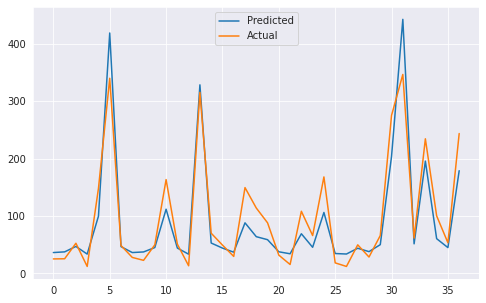

In [1395]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_en))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# Running Grid Search Cross Validation for ELastic Net Regression

In [1396]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=10)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [1397]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [1398]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.8}

Using  {'alpha': 0.01, 'l1_ratio': 0.8}  the negative mean squared error is:  -0.035246179365892076


In [1399]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_elastic))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 3241.6614718559185
RMSE : 56.93559055508179
R2 : 0.649903903595058
Adjusted R2 :  0.6180769857400633


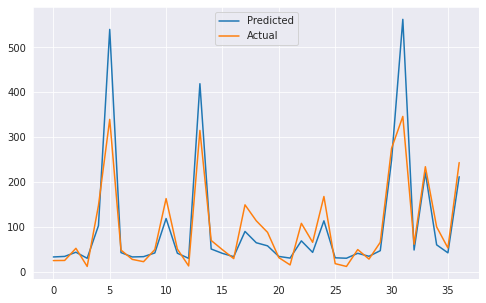

In [1400]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_elastic))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

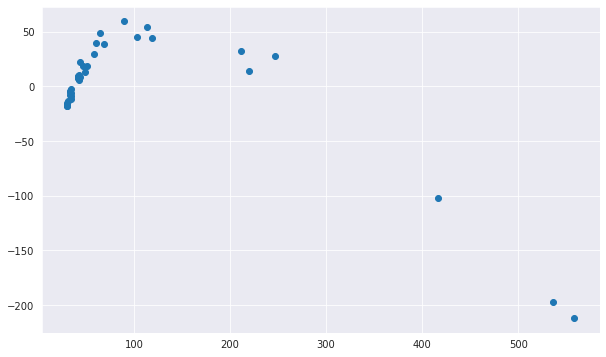

In [1401]:
### Heteroscadacity
plt.scatter(10**(y_pred_lasso),10**(y_test)-10**(y_pred_lasso))

In [1402]:
10**(y_pred_lasso)

array([ 33.48105103,  34.66089049,  43.98874403,  30.53729096,
       102.7872721 , 536.5059918 ,  43.1422392 ,  33.50358775,
        34.1382238 ,  42.4094466 , 118.70737777,  41.82405434,
        30.40491892, 416.83620471,  51.16225374,  41.43017446,
        34.07749832,  90.09031409,  64.98379376,  58.17005077,
        34.66603809,  30.96344448,  69.23383505,  43.63879267,
       113.6301952 ,  31.59920222,  30.63203489,  41.57131773,
        34.97703468,  47.4597662 , 247.0631018 , 558.10549158,
        48.91859074, 219.91381654,  60.39963898,  42.64347738,
       211.2105049 ])

In [1403]:
10**(y_test)

Date
2006-11-01     25.32
2020-06-01     25.60
2011-01-01     52.59
2008-11-01     12.26
2019-05-01    147.95
2018-06-01    339.60
2013-08-01     48.65
2020-04-01     27.95
2008-06-01     22.85
2010-01-01     49.84
2015-03-01    163.31
2010-03-01     50.97
2005-11-01     13.41
2017-12-01    315.05
2012-04-01     70.07
2008-02-01     49.42
2009-06-01     29.68
2016-01-01    149.38
2014-05-01    113.89
2014-04-01     88.14
2009-07-01     31.93
2006-06-01     15.62
2014-07-01    108.21
2012-01-01     65.99
2015-04-01    167.96
2006-09-01     18.46
2009-01-01     12.24
2007-12-01     49.81
2007-02-01     28.63
2012-05-01     66.02
2019-03-01    275.05
2018-05-01    346.20
2014-01-01     61.59
2016-11-01    234.28
2013-04-01    100.28
2009-12-01     53.41
2016-07-01    243.44
Name: Close, dtype: float64

## Train | Test Split for LR

In [1404]:
X.shape

(185, 3)

In [1405]:
y.shape

(185,)

In [1406]:
#spliting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [1407]:
#scaling data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

# Linear Regresseion

In [1408]:
#linear regression model

linear_model= LinearRegression()


================Evaluation Matrix=========================

MSE : 4805.29842041813
RMSE : 69.32025981210782
R2 : 0.49213940542445134
Adjusted R2 :  0.4567072709191805

================Evaluation Matrix=========================

  =========================================================  Evaluation Graph  ===================================================



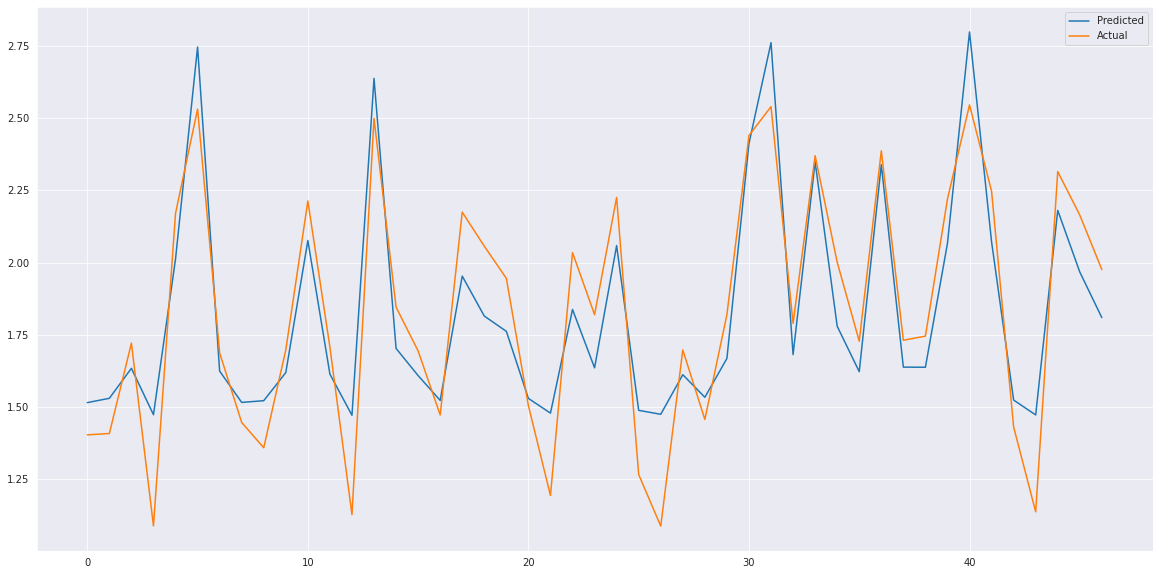

In [1409]:
train_linear_model(linear_model, X_train, y_train, X_test, y_test)

# Regularisation

## Lasso Regression

In [1410]:
# finding the best parameters for lasso by gridsearchcv
from sklearn.model_selection import GridSearchCV
lasso_model = Lasso()
#setting the parameters of the lasso model
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_grid = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)


================Evaluation Matrix=========================

MSE : 4109.3835172694535
RMSE : 64.10447345754783
R2 : 0.5656890012175715
Adjusted R2 :  0.5353882338606579

================Evaluation Matrix=========================

  =========================================================  Evaluation Graph  ===================================================



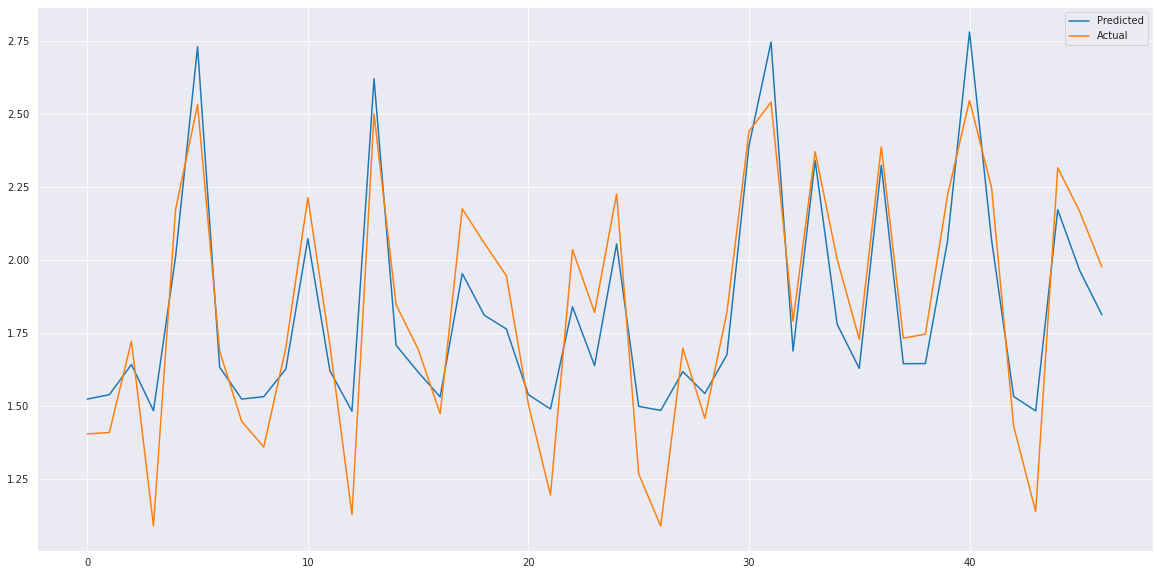

In [1411]:
# calling train_linear_model to train,fit and evalution of lasso model
train_linear_model(lasso_grid,X_train,y_train,X_test,y_test)

# Ridge Regression

In [1412]:
from sklearn.linear_model import Ridge
ridge = Ridge()

# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)


================Evaluation Matrix=========================

MSE : 4340.040930826244
RMSE : 65.8789870203409
R2 : 0.5413113661690458
Adjusted R2 :  0.5093098335761886

================Evaluation Matrix=========================

  =========================================================  Evaluation Graph  ===================================================



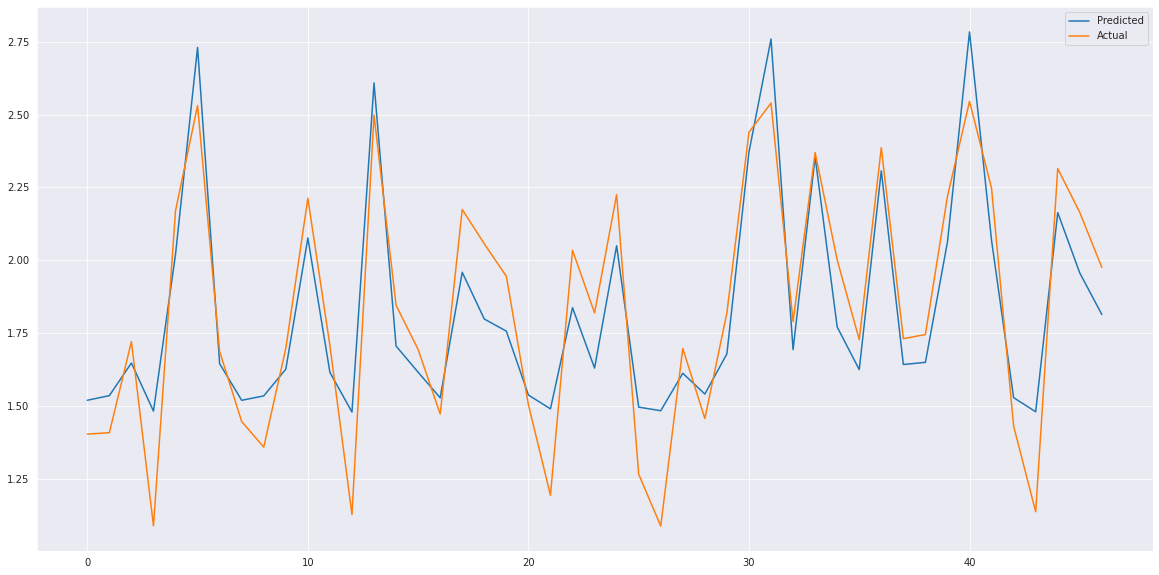

In [1413]:
# calling train_linear_model to train,fit and evalution of ridge model

train_linear_model(ridge_grid,X_train,y_train,X_test,y_test)

# ElasticNet Regression

In [1414]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()

# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5]}
elastic_grid = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)


================Evaluation Matrix=========================

MSE : 3309.2319222183896
RMSE : 57.52592391451344
R2 : 0.6502551257867606
Adjusted R2 :  0.6258543206090927

================Evaluation Matrix=========================

  =========================================================  Evaluation Graph  ===================================================



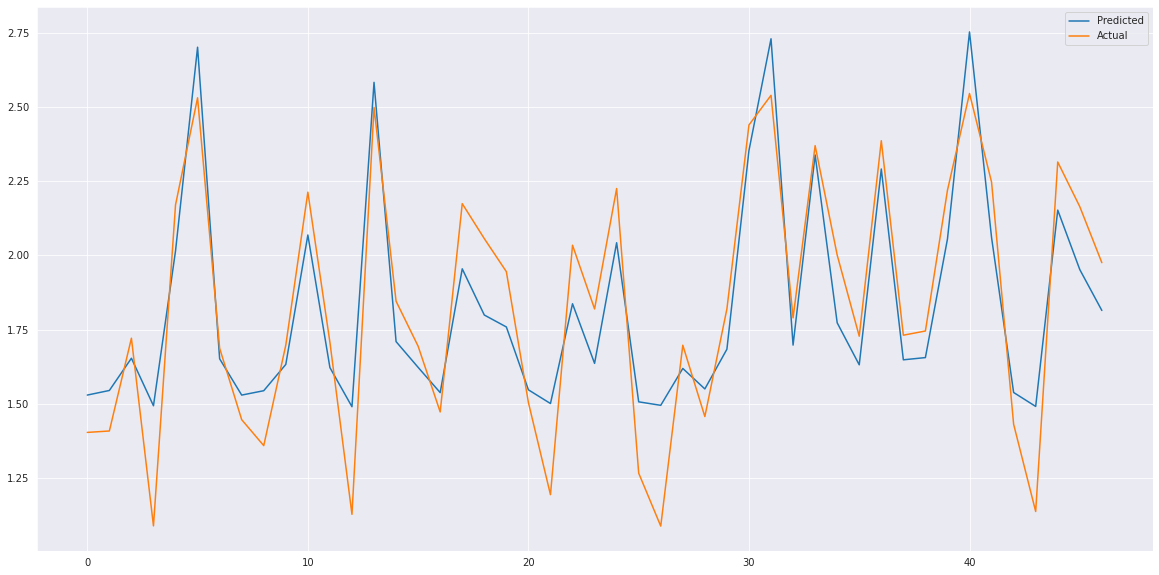

In [1415]:
# calling train_linear_model to train,fit and evalution of elasticnet model
train_linear_model(elastic_grid,X_train,y_train,X_test,y_test)

# Polynomial Regression

In [1416]:
#creating pipeline to convert x to polynomial feature and apply Linear Regression

from sklearn.pipeline import make_pipeline
#importing polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [1417]:
pipe=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())


================Evaluation Matrix=========================

MSE : 1758.8419945568646
RMSE : 41.93855022001672
R2 : 0.8141121605841146
Adjusted R2 :  0.8011432415550994

================Evaluation Matrix=========================

  =========================================================  Evaluation Graph  ===================================================



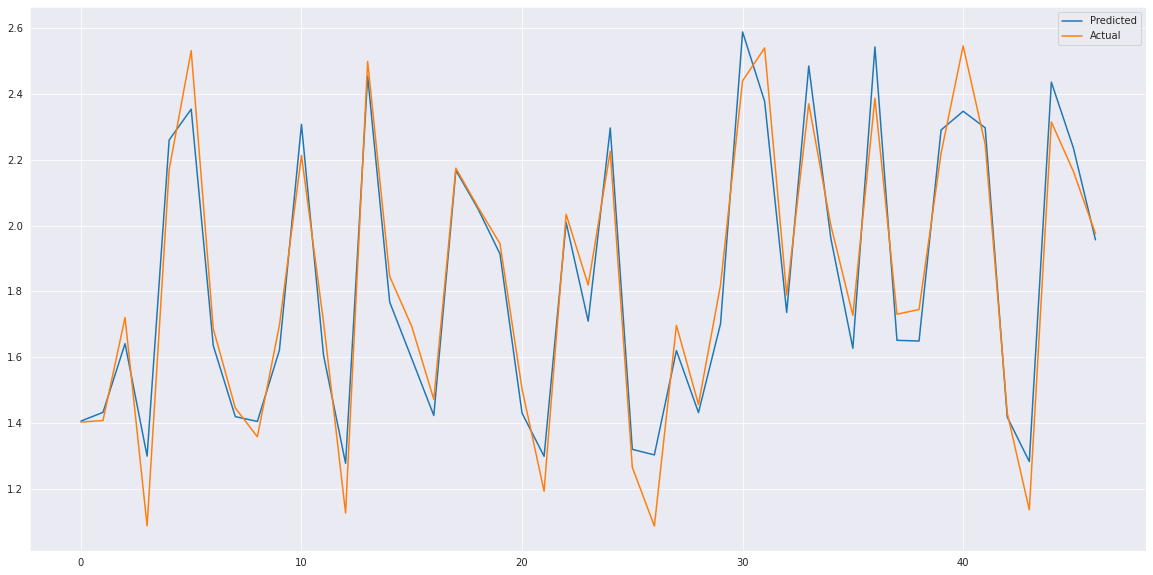

In [1418]:
# calling train_linear_model to train,fit and evalution of polynomial model
train_linear_model(pipe,X_train,y_train,X_test,y_test)

# KNN and Tree Based Method

## Train | Test split Data For Tree based methods

In [1419]:
#spliting X and y to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## KNN Regression

In [1420]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [1421]:
#creating model
scaler = MinMaxScaler()

In [1422]:
#scaling all the feature by min max scaler
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


================Evaluation Matrix=========================

MSE : 278.56729155583787
RMSE : 16.69033527391939
MAE for test dataset: 9.050702276918146
MAPE for train dataset: 0.11217101999010586
R2 : 0.9693261023417574
Adjusted R2 :  0.9666220415102396

================Evaluation Matrix=========================

    =========================================================    Evaluation Graph    ===================================================



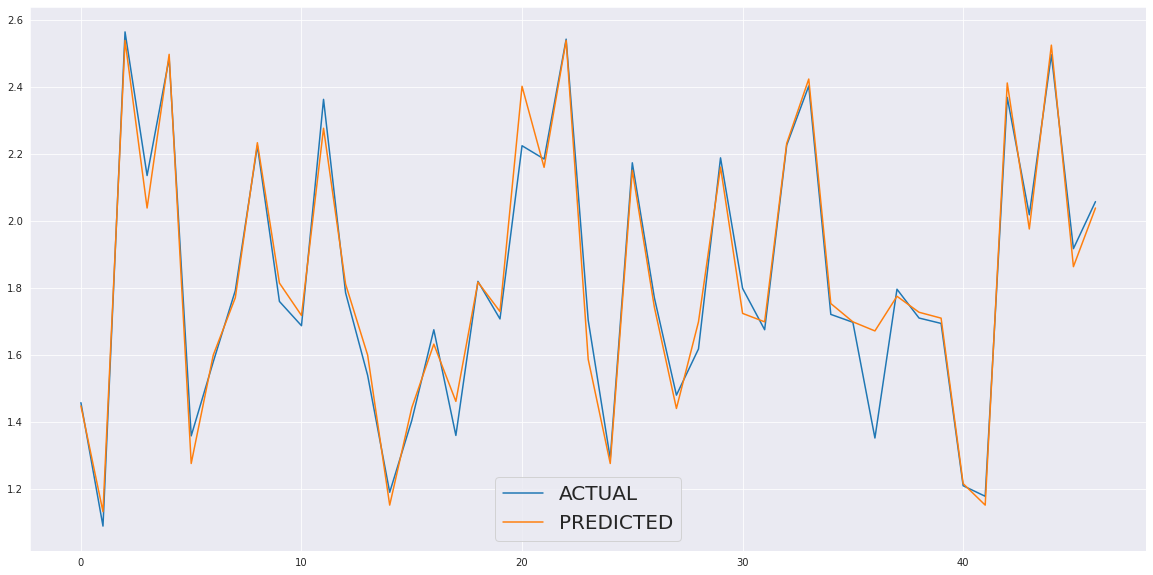

In [1423]:
# creating KNN model
knn_model = KNeighborsRegressor(n_jobs=-1)

# finding the best parameters for knn_model by gridsearchcv
param_dict={'n_neighbors':[3,5,7,9,11,13,15,21,23,25]}
knn_grid= GridSearchCV(knn_model,param_grid=param_dict)

# training and evaluating the PolynomialFeatures
run_model(knn_grid,X_train_scaled,y_train,X_test_scaled,y_test)

# Decision Tree Regression

In [1424]:
from sklearn.tree import DecisionTreeRegressor


================Evaluation Matrix=========================

MSE : 228.15040425531964
RMSE : 15.10464843203309
MAE for test dataset: 9.482127659574482
MAPE for train dataset: 0.15640169506198207
R2 : 0.9337581998448262
Adjusted R2 :  0.9726629975826516

================Evaluation Matrix=========================

    =========================================================    Evaluation Graph    ===================================================



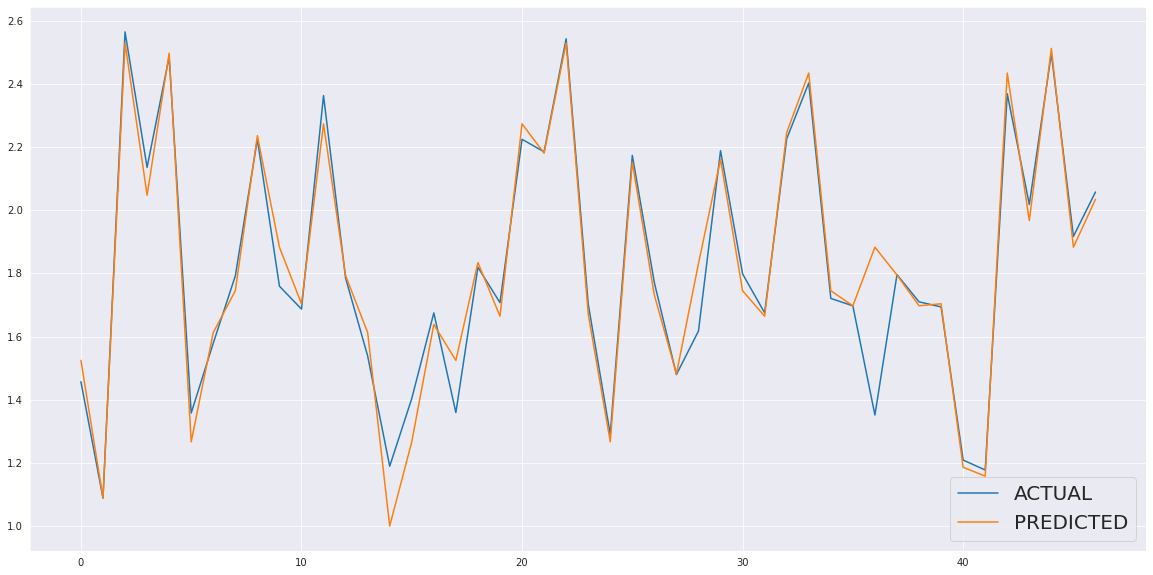

In [1425]:
#creating decision tree model
dt_model = DecisionTreeRegressor()
#calling run_model to train,fit and evalution of decision tree model
run_model(dt_model,X_train,y_train,X_test,y_test)

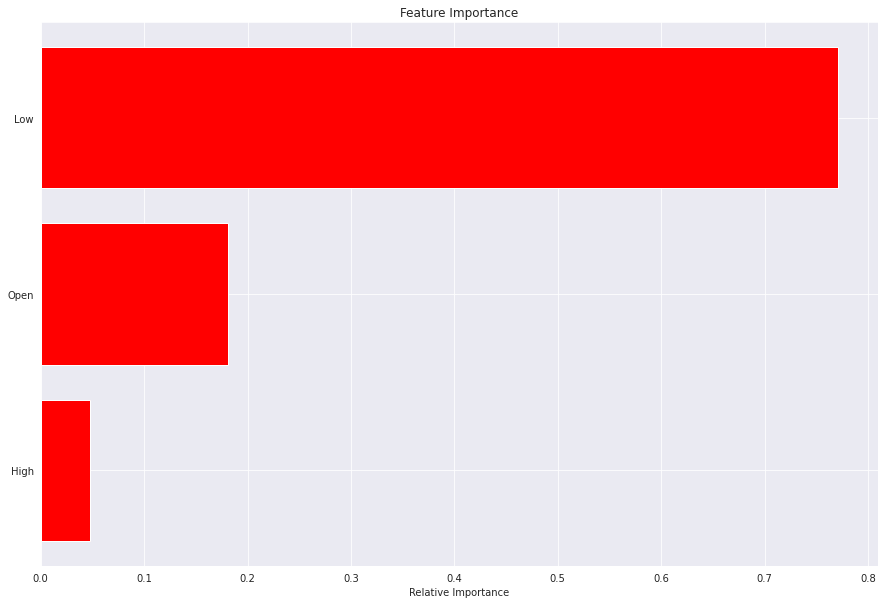

In [1426]:
#getting features importance of decision tree
get_features_importance(dt_model,X_column)

# Random Forest

In [1427]:
#importing Random forest
from sklearn.ensemble import RandomForestRegressor

In [1428]:
#creating model of random forest
rf_model = RandomForestRegressor()

In [1429]:
#creating param dict to check random forest with diffirent value of parameter through gridsearch
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

In [1430]:
#creating rf_grid model to run rf model with gridsearch
rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0)


================Evaluation Matrix=========================

MSE : 143.261978409785
RMSE : 11.969209598373027
MAE for test dataset: 7.943787174499284
MAPE for train dataset: 0.11056880476435423
R2 : 0.9696966121120093
Adjusted R2 :  0.9828343365733436

================Evaluation Matrix=========================

    =========================================================    Evaluation Graph    ===================================================



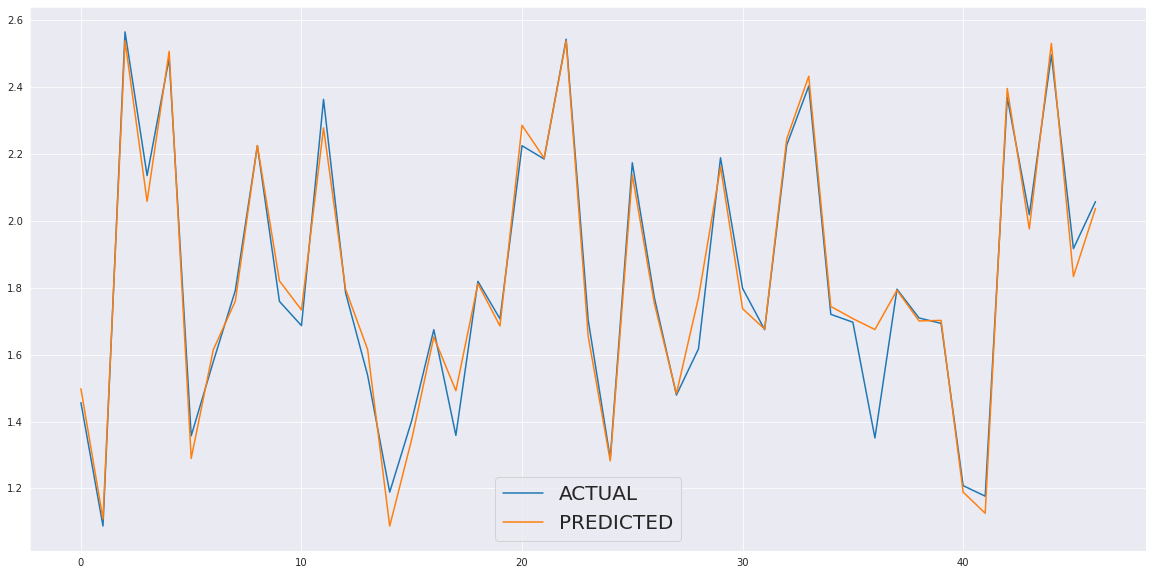

In [1431]:
#calling run_model to train,fit and evalution of decision tree model
run_model(rf_grid,X_train,y_train,X_test,y_test)

In [1432]:
#optimal rf model
optimal_rf_model=rf_grid.best_estimator_

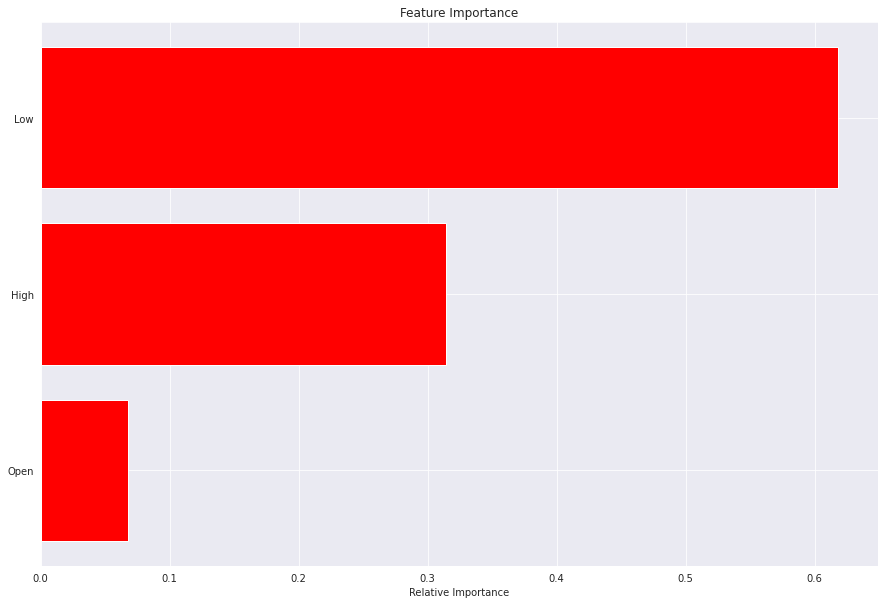

In [1433]:
#getting and visualizing features importance  of rf model
get_features_importance(optimal_rf_model,X_column)

# Gradient Boosting

In [1434]:
#importing Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

In [1435]:
#creating model of Gradient Boosting
gb_model=GradientBoostingRegressor()

In [1436]:
# creating param dict to check diffirent value of parameter
n_estimators=[80,100,150]
max_depth=[15,20,30]

params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [1437]:
#grid search for gradient bossting
gb_grid= GridSearchCV(gb_model,param_grid=params,verbose=0)


================Evaluation Matrix=========================

MSE : 185.3228734128678
RMSE : 13.613334397305746
MAE for test dataset: 8.366037645442734
MAPE for train dataset: 0.1466411737265474
R2 : 0.940370810127072
Adjusted R2 :  0.9777945962663821

================Evaluation Matrix=========================

    =========================================================    Evaluation Graph    ===================================================



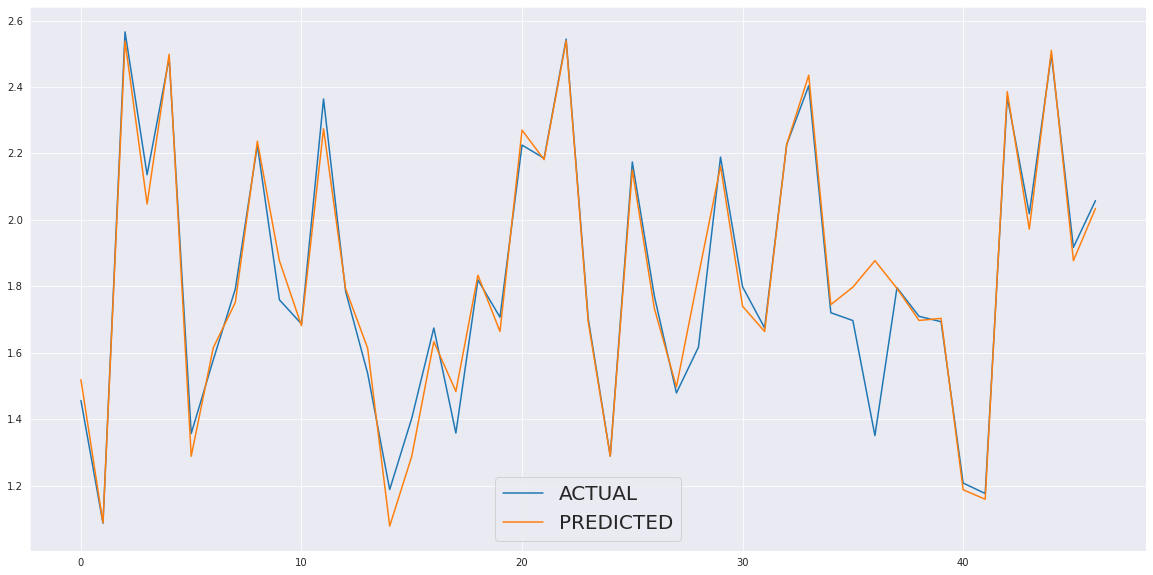

In [1438]:
#calling run_model to train,fit and evalution of gradient boosting model
run_model(gb_grid,X_train,y_train,X_test,y_test)

In [1439]:
#getting best estimator of GB model given by gb_grid model
optimal_gb_model=gb_grid.best_estimator_

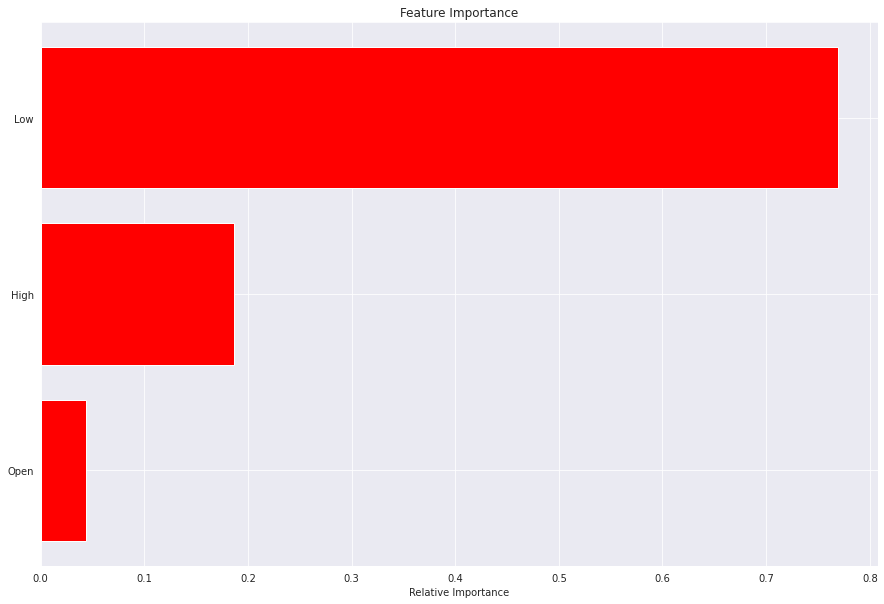

In [1440]:
#getting and visualizing features_importance of gradient boosting
get_features_importance(optimal_gb_model,X_column)

# eXtreme Gradient Boosting

In [1441]:
#importing XGBoost Regressor
from xgboost import XGBRegressor

In [1442]:
#creating Xgboost model
xgb_model=XGBRegressor()

In [1443]:
#creating param dict for gridsearch
n_estimators=[80,100,150]
max_depth=[15,20,30]


params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [1444]:
#creating xgb grid model
xgb_grid= GridSearchCV(xgb_model,param_grid=params,verbose=0)

[05:52:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:52:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:52:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:52:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:52:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:52:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:52:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:52:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

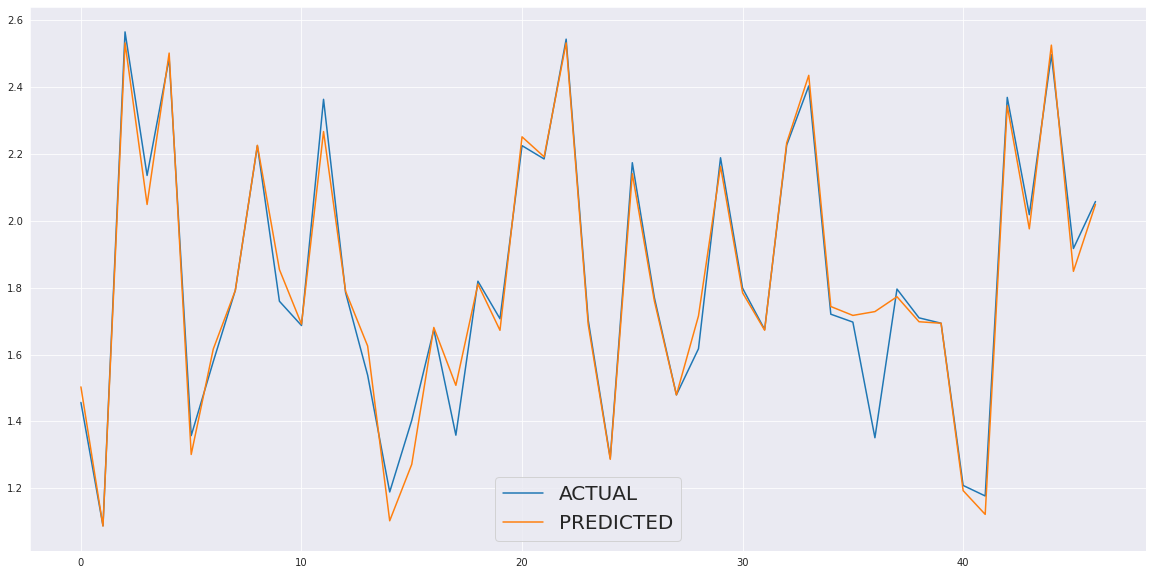

In [1445]:
#calling run_model to train,fit and evalution of xgb_grid model
run_model(xgb_grid,X_train,y_train,X_test,y_test);

In [1446]:
#getting best estimator of xgb model given by xgb grid model
optimal_xgb_model=xgb_grid.best_estimator_

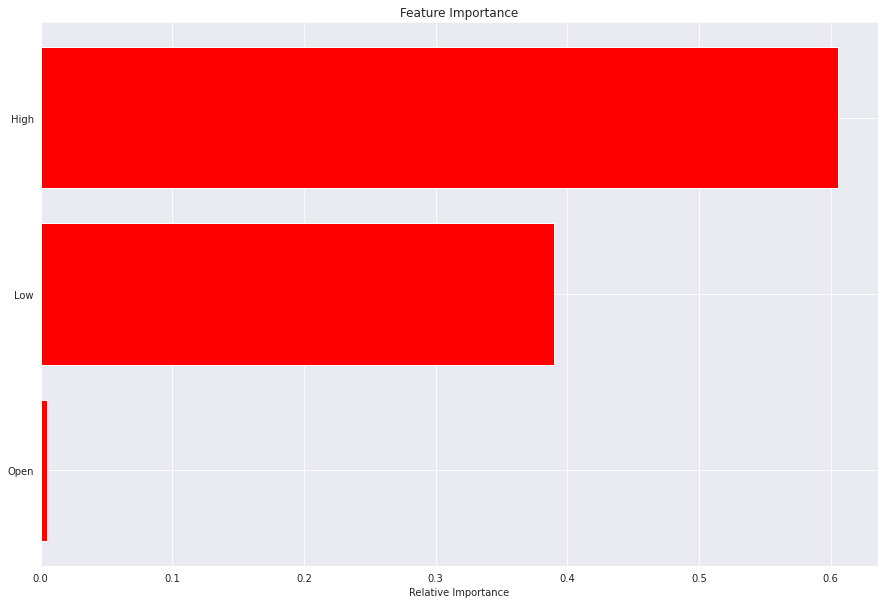

In [1447]:
#getting best param of rf model given by xgb_grid model
get_features_importance(optimal_xgb_model,X_column)

# CatBoost

In [1448]:
#installing catboost
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1449]:
#importing cat boost Regressor
from catboost import CatBoostRegressor

In [1450]:
# creating Catboost model
cb_model=CatBoostRegressor(verbose=0)


================Evaluation Matrix=========================

MSE : 149.3818850220493
RMSE : 12.22218822560221
MAE for test dataset: 7.580472645697937
MAPE for train dataset: 0.11266169695693182
R2 : 0.9665036659438438
Adjusted R2 :  0.9821010488003086

================Evaluation Matrix=========================

    =========================================================    Evaluation Graph    ===================================================



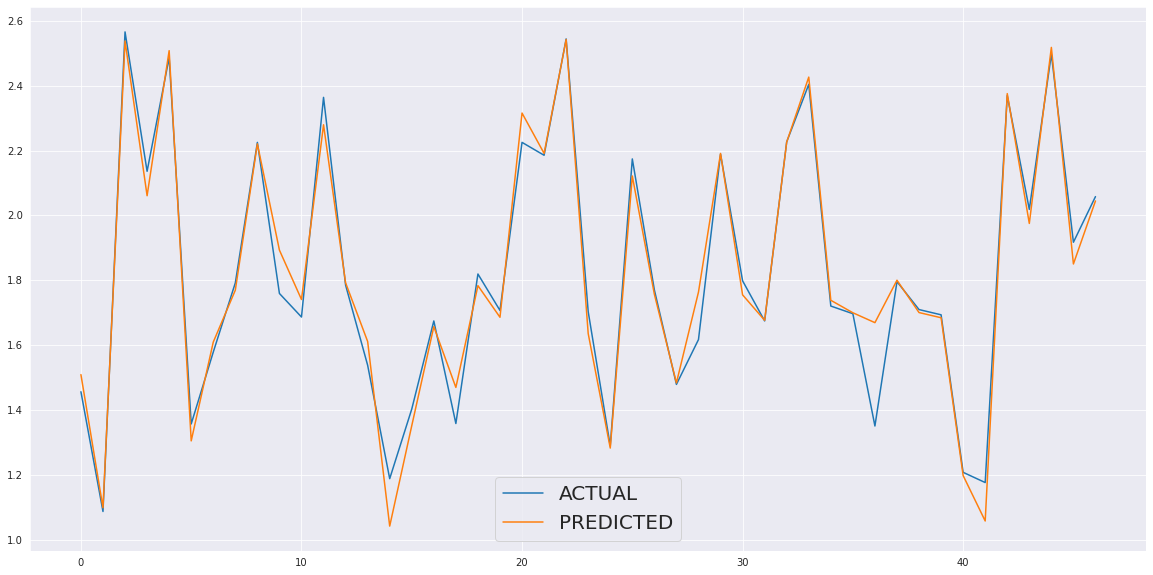

In [1451]:
#calling run_model to train,fit and evalution of catboost model
run_model(cb_model,X_train,y_train,X_test,y_test)

In [1452]:
#checking params of cat boost model
cb_model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'learning_rate': 0.029942000284790993,
 'score_function': 'Cosine',
 'task_type

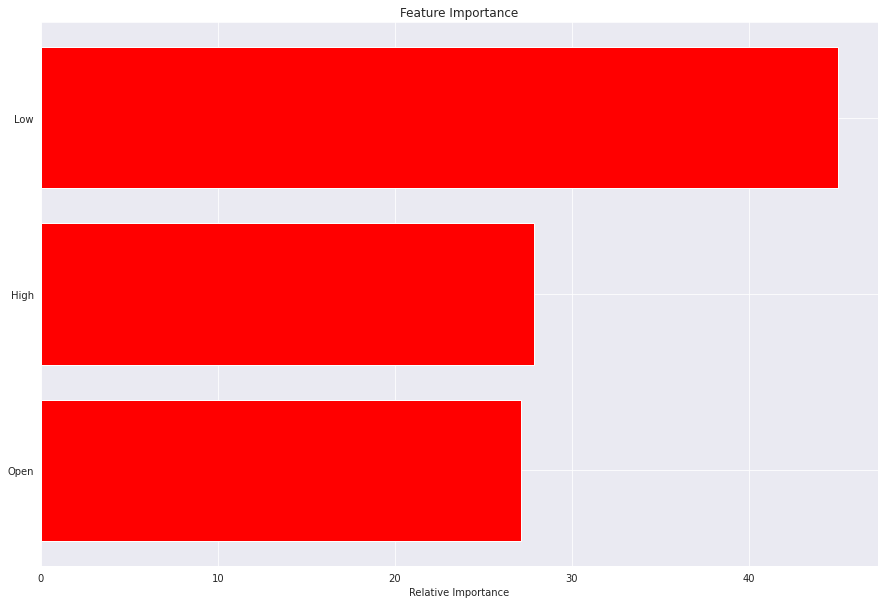

In [1453]:
#getting and visualizing features importance of catboost model
get_features_importance(cb_model,X_column)

# lightGBM

In [1454]:
import lightgbm as lgb

In [1455]:
lgbr=lgb.LGBMRegressor()

In [1456]:
#finding the best parameters for XGBRegressor by gridsearchcv
lgbr_para={'n_estimators': [150,200,250],'max_depth': [7,10,13]}
lgbr_grid=GridSearchCV(estimator=lgbr,param_grid=lgbr_para,cv=5,scoring='neg_mean_squared_error',verbose=5,n_jobs=-1)

Fitting 5 folds for each of 9 candidates, totalling 45 fits

================Evaluation Matrix=========================

MSE : 460.50094762770806
RMSE : 21.45928581355186
MAE for test dataset: 11.208118605696633
MAPE for train dataset: 0.11329215581177532
R2 : 0.9727145315811174
Adjusted R2 :  0.944822734110074

================Evaluation Matrix=========================

    =========================================================    Evaluation Graph    ===================================================



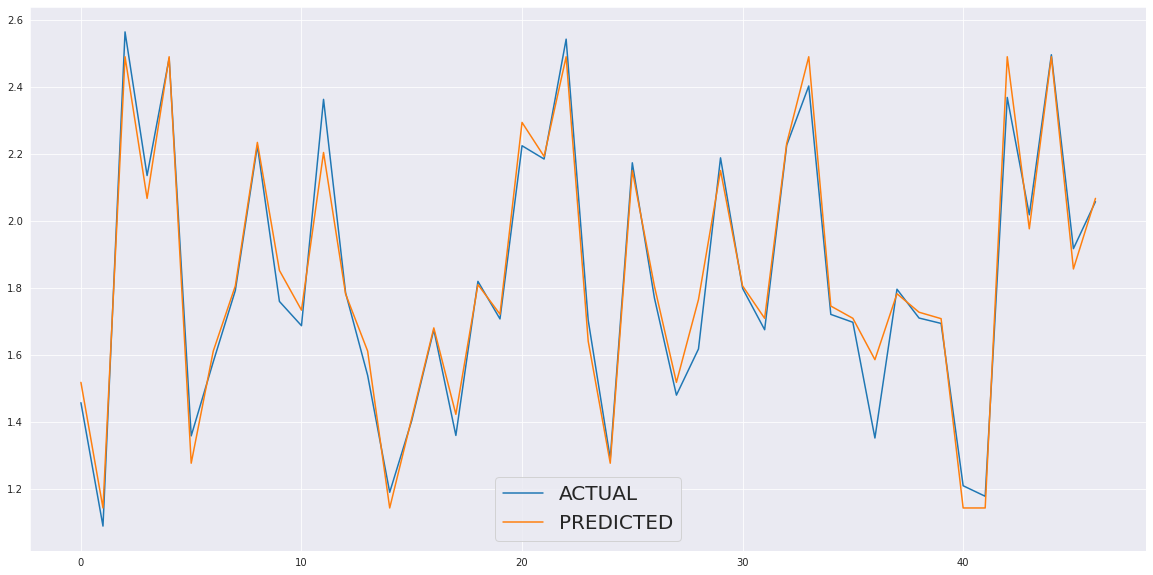

In [1457]:
#calling run_model to train,fit and evalution of catboost model
run_model(lgbr_grid,X_train,y_train,X_test,y_test)

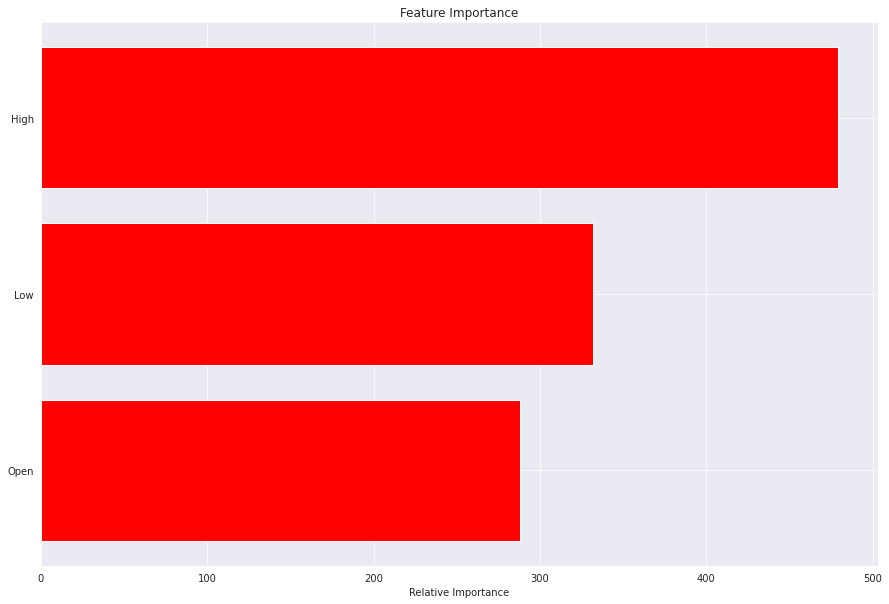

In [1458]:
#getting and visualizing features importance of catboost model
get_features_importance(lgbr_grid.best_estimator_,X_column)

# Combined Evaluation Matrix of All the models

In [1459]:
#creating dictionary to store all the metrices 
all_model_matrices={'Mean_square_error':mean_sq_error,'Root_Mean_square_error':root_mean_sq_error,'R2':r2_list,'Adjusted_R2':adj_r2_list}

In [1460]:
#list of all model made ,'Gradient_Boosting',,'CATBoost'
model_name=['Linear','Lasso','Ridge','Elasticnet','Polynomial','K-Nearyest_Neighbor','Decision_Tree','Random_Forest','Gradient_Boosting','Xtreme_GB','Catboost','LightGBM']

In [1461]:
#converting dictionary to dataframe fro easy visual
matrices_df=pd.DataFrame.from_dict(all_model_matrices,orient="index",columns=model_name)

In [1462]:
matrices_df

,Linear,Lasso,Ridge,Elasticnet,Polynomial,K-Nearyest_Neighbor,Decision_Tree,Random_Forest,Gradient_Boosting,Xtreme_GB,Catboost,LightGBM
Mean_square_error,4805.298420,4109.383517,4340.040931,3309.231922,1758.841995,278.567292,228.150404,143.261978,185.322873,144.402878,149.381885,460.500948
Root_Mean_square_error,69.320260,64.104473,65.878987,57.525924,41.938550,16.690335,15.104648,11.969210,13.613334,12.016775,12.222188,21.459286
R2,0.492139,0.565689,0.541311,0.650255,0.814112,0.969326,0.933758,0.969697,0.940371,0.965056,0.966504,0.972715
Adjusted_R2,0.456707,0.535388,0.509310,0.625854,0.801143,0.966622,0.972663,0.982834,0.977795,0.982698,0.982101,0.944823


In [1463]:
#transposing matrices_df for easy and clear view and saving that as new final matrices df
final_matrices=matrices_df.transpose().reset_index().rename(columns={'index':'Models'})

In [1464]:
final_matrices

,Models,Mean_square_error,Root_Mean_square_error,R2,Adjusted_R2
0,Linear,4805.298420,69.320260,0.492139,0.456707
1,Lasso,4109.383517,64.104473,0.565689,0.535388
2,Ridge,4340.040931,65.878987,0.541311,0.509310
3,Elasticnet,3309.231922,57.525924,0.650255,0.625854
4,Polynomial,1758.841995,41.938550,0.814112,0.801143
5,K-Nearyest_Neighbor,278.567292,16.690335,0.969326,0.966622
6,Decision_Tree,228.150404,15.104648,0.933758,0.972663
7,Random_Forest,143.261978,11.969210,0.969697,0.982834
8,Gradient_Boosting,185.322873,13.613334,0.940371,0.977795
9,Xtreme_GB,144.402878,12.016775,0.965056,0.982698


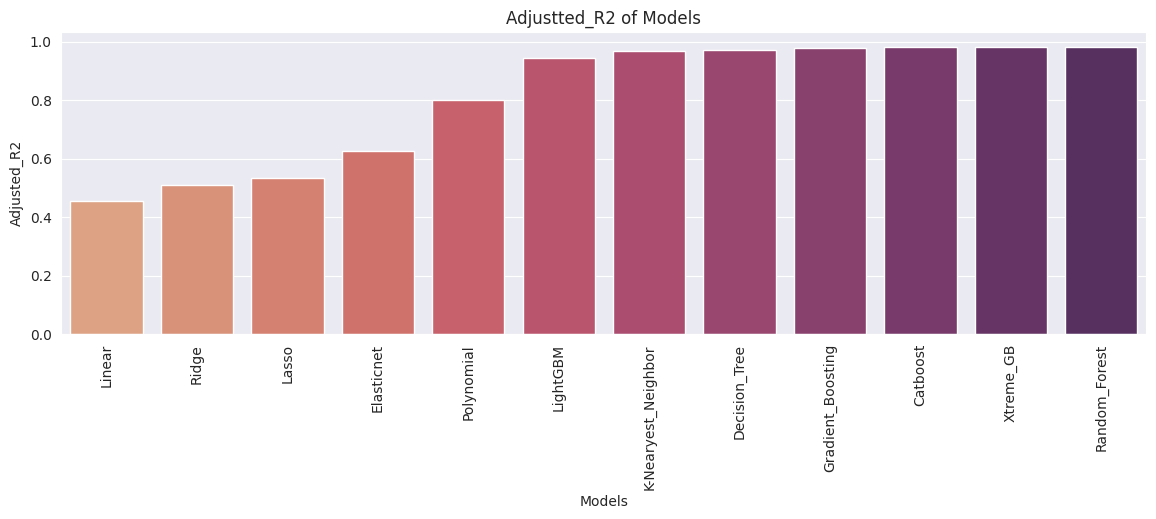

In [1465]:
#creating bar plot to visualize the Adjusted R2 of model 
plt.figure(figsize=(14,4),dpi=100)
sns.barplot(x='Models',y='Adjusted_R2',data=final_matrices.sort_values('Adjusted_R2'),palette="flare").set(title='Adjustted_R2 of Models')
plt.xticks(rotation=90);

# Model Explainibility

In [1466]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1467]:
from sklearn.tree import export_graphviz
import shap 
sns.set_style('darkgrid')

In [1468]:
for_instance=2

In [1469]:
# shape for xgboost model
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(xgb_grid.best_estimator_)
# obtain shap values for the first row of the test data
shap_values = explainer(X_test,check_additivity=False)
# # visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[for_instance])

In [1470]:
#shape for catboost model
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(cb_model)
# obtain shap values for the first row of the test data
shap_values = explainer(X_test,check_additivity=False)
# # visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[for_instance])

In [1471]:
#shap for lightGBM model
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(lgbr_grid.best_estimator_)
# obtain shap values for the first row of the test data
shap_values = explainer(X_test,check_additivity=False)
# # visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[for_instance])

# ELI5

In [1472]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1473]:
import eli5 as eli

In [1474]:
feature_names=list(X_test.columns)
feature_names

['Open', 'High', 'Low']

In [1475]:
for_instance=2

In [1476]:
#eli5 for xgboost model 
eli.show_prediction(xgb_grid.best_estimator_, X_test.reset_index(drop=True).loc[[for_instance]],
                    feature_names=feature_names,
                    show_feature_values=True)

In [1477]:
#eli5 for lgbr model 
eli.show_prediction(lgbr_grid.best_estimator_, X_test.reset_index(drop=True).loc[[for_instance]],
                    feature_names=feature_names,
                    show_feature_values=True)

* The green color shows how much the feature contributes to the prediction of the respective class and the weights are positive for the green color.

* The red color has negative weights that indicate the feature isn't contributing to the prediction of that class.

* It can be observed from the above output, eli5 shows us the contribution of each feature in predicting the output.